In [ ]:
!pip3 install --user kaggle

In [1]:
!unzip -q ./plates.zip

In [22]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [86]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset, Subset
from sklearn.model_selection import train_test_split
train_path = './plates/train'
test_path = './plates/test'

'''
    Вместо этого, каждый раз, когда вы загружаете изображение,
    к нему применяются случайные преобразования
    (например, поворот, отражение, изменение цвета и т.д.).
'''

# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(244),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(25),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

' \n    Вместо этого, каждый раз, когда вы загружаете изображение, \n    к нему применяются случайные преобразования \n    (например, поворот, отражение, изменение цвета и т.д.).\n'

In [136]:
!pip3 uninstall Image
!pip3 install Image

Found existing installation: image 1.5.33
Uninstalling image-1.5.33:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/image-1.5.33.dist-info/*
    /usr/local/lib/python3.11/dist-packages/image/*
Proceed (Y/n)? Y
  Successfully uninstalled image-1.5.33
  Using cached image-1.5.33-py2.py3-none-any.whl


In [141]:
import os
from PIL import Image

train_transform = transforms.RandomChoice([
    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.RandomOrder([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
        ]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.RandomRotation(45),
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.RandomGrayscale(p=1),
    transforms.RandomOrder([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
        ]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.4, hue=0.4),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.RandomChoice([
    transforms.Compose([
        transforms.RandomRotation(degrees = 20),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.RandomRotation(degrees = 40),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.RandomRotation(degrees = 60),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.RandomPerspective(distortion_scale=0.2, p=0.1, interpolation=3, fill=255),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.RandomOrder([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
        ]),
        transforms.Resize((224,224)),
        transforms.CenterCrop(200),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.RandomOrder([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
        ]),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.CenterCrop(200),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
])


full_dataset = datasets.ImageFolder(train_path, transform=train_transform)

train_files, val_files = train_test_split(
    range(len(full_dataset)), test_size=0.2, random_state=42, stratify=full_dataset.targets
)

train_dataset = Subset(full_dataset, train_files)
val_dataset = Subset(full_dataset, val_files)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)
len(train_dataset), len(val_dataset)

class TestDataset(Dataset):
    def __init__(self, dir, transform = None):
        self.dir = dir
        self.transform = transform
        self.image_files = [os.path.join(dir, f) for f in os.listdir(dir) if f.endswith(('jpg', 'png', 'jpeg'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        img_path = self.image_files[index]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, os.path.basename(img_path)

test_dataset = TestDataset(test_path, test_transform)
test_loader = DataLoader(test_dataset, 64, shuffle=False)

In [119]:
DEVICE = torch.device("cuda")

In [120]:
def fit_epoch(model, train_loader, optimizer, crtiterion):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0
    processed_data = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE)

        out = model(x_batch)
        loss = crtiterion(out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = torch.argmax(out, 1)
        running_loss += loss.item() * x_batch.size(0)
        running_corrects += torch.sum(preds == y_batch.data)
        processed_data += x_batch.size(0)
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc



In [121]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    print(f"loss {val_loss}")
    return val_loss, val_acc

In [122]:
from tqdm import tqdm

def train(model, train_loader, val_loader, optimizer, criterion, epochs):
  running_loss = 0.0
  running_corrects = 0
  processed_data = 0
  history = []
  log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

  best_val_acc = 0.0
  best_weights = None
  with tqdm(desc="epoch", total=epochs) as pbar_outer:
    for epoch in range(epochs):
      train_loss, train_acc = fit_epoch(model, train_loader, optimizer, criterion)
      print("loss", train_loss)

      val_loss, val_acc = eval_epoch(model, val_loader, criterion)
      history.append((train_loss, train_acc, val_loss, val_acc))
      tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                            v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))

      if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_weights = model.state_dict().copy()

  if best_weights is not None:
    model.load_state_dict(best_model_weights)


  return history


In [123]:
model = models.resnet18(pretrained=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [124]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [125]:
from itertools import chain

model.fc = torch.nn.Linear(512, 2, bias=True)

for param in model.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = True

optimizer = torch.optim.AdamW(chain(
    model.layer4.parameters(), model.fc.parameters()
))

for param in model.fc.parameters():
    param.requires_grad = True

# optimizer = torch.optim.AdamW(model.fc.parameters())
optimizer = torch.optim.Adam([{'params': model.fc.parameters(), 'lr': 0.0001, 'weight_decay': 0.01},
                              {'params': model.layer4.parameters(), 'lr': 0.001, 'weight_decay': 0.01}],
                             betas=(0.9, 0.999))

model = model.to(DEVICE)

criterion = torch.nn.CrossEntropyLoss()

history = train(model, train_loader, val_loader, optimizer, criterion, 100)

epoch:   0%|          | 0/100 [00:00<?, ?it/s]

loss 0.8420699238777161
loss 1.013794183731079

Epoch 001 train_loss: 0.8421     val_loss 1.0138 train_acc 0.4688 val_acc 0.6250


epoch:   0%|          | 0/100 [00:00<?, ?it/s]

loss 0.05039174482226372
loss 2.5617141723632812

Epoch 002 train_loss: 0.0504     val_loss 2.5617 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:00<?, ?it/s]

loss 0.13043519854545593
loss 2.54374098777771

Epoch 003 train_loss: 0.1304     val_loss 2.5437 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:00<?, ?it/s]

loss 0.006788460072129965
loss 3.345304489135742

Epoch 004 train_loss: 0.0068     val_loss 3.3453 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:01<?, ?it/s]

loss 0.06664127111434937
loss 2.000797748565674

Epoch 005 train_loss: 0.0666     val_loss 2.0008 train_acc 0.9375 val_acc 0.6250


epoch:   0%|          | 0/100 [00:01<?, ?it/s]

loss 0.014066764153540134
loss 1.850218653678894

Epoch 006 train_loss: 0.0141     val_loss 1.8502 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:01<?, ?it/s]

loss 0.020174428820610046
loss 1.5521658658981323

Epoch 007 train_loss: 0.0202     val_loss 1.5522 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:01<?, ?it/s]

loss 0.009824301116168499
loss 1.2906068563461304

Epoch 008 train_loss: 0.0098     val_loss 1.2906 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:02<?, ?it/s]

loss 0.021809816360473633
loss 2.6811537742614746

Epoch 009 train_loss: 0.0218     val_loss 2.6812 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:02<?, ?it/s]

loss 0.1309056282043457
loss 4.92004919052124

Epoch 010 train_loss: 0.1309     val_loss 4.9200 train_acc 0.9688 val_acc 0.6250


epoch:   0%|          | 0/100 [00:02<?, ?it/s]

loss 0.0027545862831175327
loss 2.940120220184326

Epoch 011 train_loss: 0.0028     val_loss 2.9401 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:02<?, ?it/s]

loss 0.0019660224206745625
loss 5.019357681274414

Epoch 012 train_loss: 0.0020     val_loss 5.0194 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:03<?, ?it/s]

loss 0.0004367501533124596
loss 3.027282476425171

Epoch 013 train_loss: 0.0004     val_loss 3.0273 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:03<?, ?it/s]

loss 0.041742634028196335
loss 6.506468772888184

Epoch 014 train_loss: 0.0417     val_loss 6.5065 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:03<?, ?it/s]

loss 0.009052618406713009
loss 4.841804504394531

Epoch 015 train_loss: 0.0091     val_loss 4.8418 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:03<?, ?it/s]

loss 0.05712736025452614
loss 5.870233058929443

Epoch 016 train_loss: 0.0571     val_loss 5.8702 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:04<?, ?it/s]

loss 0.00902476441115141
loss 3.3913891315460205

Epoch 017 train_loss: 0.0090     val_loss 3.3914 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:04<?, ?it/s]

loss 0.0025899524334818125
loss 3.2313930988311768

Epoch 018 train_loss: 0.0026     val_loss 3.2314 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:04<?, ?it/s]

loss 0.0020763094071298838
loss 3.324064016342163

Epoch 019 train_loss: 0.0021     val_loss 3.3241 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:04<?, ?it/s]

loss 0.015169588848948479
loss 3.0061285495758057

Epoch 020 train_loss: 0.0152     val_loss 3.0061 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:05<?, ?it/s]

loss 0.0018610501429066062
loss 2.6010892391204834

Epoch 021 train_loss: 0.0019     val_loss 2.6011 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:05<?, ?it/s]

loss 0.0018205420346930623
loss 2.140058994293213

Epoch 022 train_loss: 0.0018     val_loss 2.1401 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:05<?, ?it/s]

loss 0.0004311964148655534
loss 1.973930835723877

Epoch 023 train_loss: 0.0004     val_loss 1.9739 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:05<?, ?it/s]

loss 0.16130687296390533
loss 1.0758272409439087

Epoch 024 train_loss: 0.1613     val_loss 1.0758 train_acc 0.9688 val_acc 0.8750


epoch:   0%|          | 0/100 [00:06<?, ?it/s]

loss 0.0009907756466418505
loss 1.2387527227401733

Epoch 025 train_loss: 0.0010     val_loss 1.2388 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:06<?, ?it/s]

loss 0.004646033979952335
loss 0.519700825214386

Epoch 026 train_loss: 0.0046     val_loss 0.5197 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:06<?, ?it/s]

loss 0.010719564743340015
loss 0.060350846499204636

Epoch 027 train_loss: 0.0107     val_loss 0.0604 train_acc 1.0000 val_acc 1.0000


epoch:   0%|          | 0/100 [00:06<?, ?it/s]

loss 0.01689887046813965
loss 0.8555781245231628

Epoch 028 train_loss: 0.0169     val_loss 0.8556 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:07<?, ?it/s]

loss 0.010310606099665165
loss 0.7558826208114624

Epoch 029 train_loss: 0.0103     val_loss 0.7559 train_acc 1.0000 val_acc 0.8750


epoch:   0%|          | 0/100 [00:07<?, ?it/s]

loss 0.005307906772941351
loss 0.9288950562477112

Epoch 030 train_loss: 0.0053     val_loss 0.9289 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:07<?, ?it/s]

loss 0.009701303206384182
loss 0.9985806345939636

Epoch 031 train_loss: 0.0097     val_loss 0.9986 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:07<?, ?it/s]

loss 0.0034091584384441376
loss 1.8388296365737915

Epoch 032 train_loss: 0.0034     val_loss 1.8388 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:08<?, ?it/s]

loss 0.0066817086189985275
loss 1.8679819107055664

Epoch 033 train_loss: 0.0067     val_loss 1.8680 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:08<?, ?it/s]

loss 0.11359082907438278
loss 0.6756807565689087

Epoch 034 train_loss: 0.1136     val_loss 0.6757 train_acc 0.9688 val_acc 0.6250


epoch:   0%|          | 0/100 [00:08<?, ?it/s]

loss 0.002735209185630083
loss 2.536133289337158

Epoch 035 train_loss: 0.0027     val_loss 2.5361 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:08<?, ?it/s]

loss 0.0025765043683350086
loss 2.676528215408325

Epoch 036 train_loss: 0.0026     val_loss 2.6765 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:09<?, ?it/s]

loss 0.011504820547997952
loss 2.727095603942871

Epoch 037 train_loss: 0.0115     val_loss 2.7271 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:09<?, ?it/s]

loss 0.008206294849514961
loss 2.2856204509735107

Epoch 038 train_loss: 0.0082     val_loss 2.2856 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:09<?, ?it/s]

loss 0.010771134868264198
loss 3.7637338638305664

Epoch 039 train_loss: 0.0108     val_loss 3.7637 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:10<?, ?it/s]

loss 0.008514510467648506
loss 3.7161405086517334

Epoch 040 train_loss: 0.0085     val_loss 3.7161 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:10<?, ?it/s]

loss 0.005225131753832102
loss 3.549126386642456

Epoch 041 train_loss: 0.0052     val_loss 3.5491 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:10<?, ?it/s]

loss 0.026785239577293396
loss 3.0461490154266357

Epoch 042 train_loss: 0.0268     val_loss 3.0461 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:11<?, ?it/s]

loss 0.0036541325971484184
loss 3.4233596324920654

Epoch 043 train_loss: 0.0037     val_loss 3.4234 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:11<?, ?it/s]

loss 0.002582922810688615
loss 2.7761342525482178

Epoch 044 train_loss: 0.0026     val_loss 2.7761 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:11<?, ?it/s]

loss 0.0036292492877691984
loss 2.144287586212158

Epoch 045 train_loss: 0.0036     val_loss 2.1443 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:11<?, ?it/s]

loss 0.006017032545059919
loss 2.144394636154175

Epoch 046 train_loss: 0.0060     val_loss 2.1444 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:12<?, ?it/s]

loss 0.0018627296667546034
loss 1.390824794769287

Epoch 047 train_loss: 0.0019     val_loss 1.3908 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:12<?, ?it/s]

loss 0.0054398225620388985
loss 1.2127574682235718

Epoch 048 train_loss: 0.0054     val_loss 1.2128 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:12<?, ?it/s]

loss 0.0018356622895225883
loss 1.1505389213562012

Epoch 049 train_loss: 0.0018     val_loss 1.1505 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:12<?, ?it/s]

loss 0.003291045082733035
loss 0.4927600622177124

Epoch 050 train_loss: 0.0033     val_loss 0.4928 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:13<?, ?it/s]

loss 0.0020834479946643114
loss 0.9814592599868774

Epoch 051 train_loss: 0.0021     val_loss 0.9815 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:13<?, ?it/s]

loss 0.004295611288398504
loss 0.5956274271011353

Epoch 052 train_loss: 0.0043     val_loss 0.5956 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:13<?, ?it/s]

loss 0.000898779951967299
loss 1.1222175359725952

Epoch 053 train_loss: 0.0009     val_loss 1.1222 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:13<?, ?it/s]

loss 0.0012368327006697655
loss 0.8692383766174316

Epoch 054 train_loss: 0.0012     val_loss 0.8692 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:14<?, ?it/s]

loss 0.002462957287207246
loss 0.6895283460617065

Epoch 055 train_loss: 0.0025     val_loss 0.6895 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:14<?, ?it/s]

loss 0.0006479164585471153
loss 0.8948258757591248

Epoch 056 train_loss: 0.0006     val_loss 0.8948 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:14<?, ?it/s]

loss 0.004999417345970869
loss 1.0656002759933472

Epoch 057 train_loss: 0.0050     val_loss 1.0656 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:14<?, ?it/s]

loss 0.00048333409358747303
loss 0.7682371139526367

Epoch 058 train_loss: 0.0005     val_loss 0.7682 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:15<?, ?it/s]

loss 0.002619324717670679
loss 0.8106047511100769

Epoch 059 train_loss: 0.0026     val_loss 0.8106 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:15<?, ?it/s]

loss 0.0009374151704832911
loss 0.5357306599617004

Epoch 060 train_loss: 0.0009     val_loss 0.5357 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:15<?, ?it/s]

loss 0.001396265928633511
loss 0.9812090396881104

Epoch 061 train_loss: 0.0014     val_loss 0.9812 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:15<?, ?it/s]

loss 0.0014715229626744986
loss 0.7583419680595398

Epoch 062 train_loss: 0.0015     val_loss 0.7583 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:16<?, ?it/s]

loss 0.0005738388863392174
loss 0.9310660362243652

Epoch 063 train_loss: 0.0006     val_loss 0.9311 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:16<?, ?it/s]

loss 0.0010594434570521116
loss 0.9628362655639648

Epoch 064 train_loss: 0.0011     val_loss 0.9628 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:16<?, ?it/s]

loss 0.0004686726024374366
loss 0.5704565048217773

Epoch 065 train_loss: 0.0005     val_loss 0.5705 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:16<?, ?it/s]

loss 0.0005637447466142476
loss 0.896443784236908

Epoch 066 train_loss: 0.0006     val_loss 0.8964 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:17<?, ?it/s]

loss 0.0007858223398216069
loss 0.8959372043609619

Epoch 067 train_loss: 0.0008     val_loss 0.8959 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:17<?, ?it/s]

loss 0.0005830367445014417
loss 0.5555732250213623

Epoch 068 train_loss: 0.0006     val_loss 0.5556 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:17<?, ?it/s]

loss 0.0006003379239700735
loss 0.9495162963867188

Epoch 069 train_loss: 0.0006     val_loss 0.9495 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:17<?, ?it/s]

loss 0.0006034057005308568
loss 0.8622220754623413

Epoch 070 train_loss: 0.0006     val_loss 0.8622 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:18<?, ?it/s]

loss 0.0004520216607488692
loss 0.8750221729278564

Epoch 071 train_loss: 0.0005     val_loss 0.8750 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:18<?, ?it/s]

loss 0.0002788516285363585
loss 0.7805307507514954

Epoch 072 train_loss: 0.0003     val_loss 0.7805 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:18<?, ?it/s]

loss 0.0007890872657299042
loss 0.6123849749565125

Epoch 073 train_loss: 0.0008     val_loss 0.6124 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:18<?, ?it/s]

loss 0.0028064241632819176
loss 0.8216120004653931

Epoch 074 train_loss: 0.0028     val_loss 0.8216 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:19<?, ?it/s]

loss 0.00028531538555398583
loss 0.5715015530586243

Epoch 075 train_loss: 0.0003     val_loss 0.5715 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:19<?, ?it/s]

loss 0.0006760723190382123
loss 0.8233131766319275

Epoch 076 train_loss: 0.0007     val_loss 0.8233 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:19<?, ?it/s]

loss 0.0187271349132061
loss 0.6909251809120178

Epoch 077 train_loss: 0.0187     val_loss 0.6909 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:19<?, ?it/s]

loss 0.8333275318145752
loss 4.346943378448486

Epoch 078 train_loss: 0.8333     val_loss 4.3469 train_acc 0.9062 val_acc 0.5000


epoch:   0%|          | 0/100 [00:20<?, ?it/s]

loss 0.13575294613838196
loss 25.20705795288086

Epoch 079 train_loss: 0.1358     val_loss 25.2071 train_acc 0.9375 val_acc 0.5000


epoch:   0%|          | 0/100 [00:20<?, ?it/s]

loss 1.9732060432434082
loss 10.02813720703125

Epoch 080 train_loss: 1.9732     val_loss 10.0281 train_acc 0.6250 val_acc 0.6250


epoch:   0%|          | 0/100 [00:20<?, ?it/s]

loss 0.08499810099601746
loss 20.207748413085938

Epoch 081 train_loss: 0.0850     val_loss 20.2077 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:20<?, ?it/s]

loss 0.11096566915512085
loss 31.46695327758789

Epoch 082 train_loss: 0.1110     val_loss 31.4670 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:21<?, ?it/s]

loss 0.11342921853065491
loss 54.584014892578125

Epoch 083 train_loss: 0.1134     val_loss 54.5840 train_acc 0.9375 val_acc 0.5000


epoch:   0%|          | 0/100 [00:21<?, ?it/s]

loss 0.09150595963001251
loss 30.009946823120117

Epoch 084 train_loss: 0.0915     val_loss 30.0099 train_acc 0.9688 val_acc 0.5000


epoch:   0%|          | 0/100 [00:21<?, ?it/s]

loss 0.08073092252016068
loss 35.95604705810547

Epoch 085 train_loss: 0.0807     val_loss 35.9560 train_acc 0.9688 val_acc 0.6250


epoch:   0%|          | 0/100 [00:21<?, ?it/s]

loss 0.020906444638967514
loss 25.39714813232422

Epoch 086 train_loss: 0.0209     val_loss 25.3971 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:22<?, ?it/s]

loss 0.03355899825692177
loss 24.81369400024414

Epoch 087 train_loss: 0.0336     val_loss 24.8137 train_acc 1.0000 val_acc 0.5000


epoch:   0%|          | 0/100 [00:22<?, ?it/s]

loss 0.07803311944007874
loss 19.436870574951172

Epoch 088 train_loss: 0.0780     val_loss 19.4369 train_acc 0.9375 val_acc 0.7500


epoch:   0%|          | 0/100 [00:22<?, ?it/s]

loss 0.024412978440523148
loss 7.87730073928833

Epoch 089 train_loss: 0.0244     val_loss 7.8773 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:23<?, ?it/s]

loss 0.010995849035680294
loss 8.789536476135254

Epoch 090 train_loss: 0.0110     val_loss 8.7895 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:23<?, ?it/s]

loss 0.047983426600694656
loss 9.267088890075684

Epoch 091 train_loss: 0.0480     val_loss 9.2671 train_acc 0.9688 val_acc 0.7500


epoch:   0%|          | 0/100 [00:23<?, ?it/s]

loss 0.017367735505104065
loss 5.006094455718994

Epoch 092 train_loss: 0.0174     val_loss 5.0061 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:24<?, ?it/s]

loss 0.01518149022012949
loss 3.7547221183776855

Epoch 093 train_loss: 0.0152     val_loss 3.7547 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:24<?, ?it/s]

loss 0.0056893606670200825
loss 5.149622440338135

Epoch 094 train_loss: 0.0057     val_loss 5.1496 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:24<?, ?it/s]

loss 0.01332294475287199
loss 4.47370719909668

Epoch 095 train_loss: 0.0133     val_loss 4.4737 train_acc 1.0000 val_acc 0.7500


epoch:   0%|          | 0/100 [00:24<?, ?it/s]

loss 0.03377088904380798
loss 5.1943159103393555

Epoch 096 train_loss: 0.0338     val_loss 5.1943 train_acc 0.9688 val_acc 0.7500


epoch:   0%|          | 0/100 [00:24<?, ?it/s]

loss 0.018847288563847542
loss 4.263194561004639

Epoch 097 train_loss: 0.0188     val_loss 4.2632 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:25<?, ?it/s]

loss 0.007322288118302822
loss 3.310305118560791

Epoch 098 train_loss: 0.0073     val_loss 3.3103 train_acc 1.0000 val_acc 0.6250


epoch:   0%|          | 0/100 [00:25<?, ?it/s]

loss 0.07193884998559952
loss 3.108611822128296

Epoch 099 train_loss: 0.0719     val_loss 3.1086 train_acc 0.9688 val_acc 0.6250


epoch:   0%|          | 0/100 [00:25<?, ?it/s]

loss 0.009528807364404202
loss 3.656662940979004

Epoch 100 train_loss: 0.0095     val_loss 3.6567 train_acc 1.0000 val_acc 0.6250


In [126]:
eval_epoch(model, val_loader, criterion)

loss 6.08627986907959


(6.08627986907959, tensor(0.6250, device='cuda:0', dtype=torch.float64))

In [127]:
loss, acc, val_loss, val_acc = zip(*history)

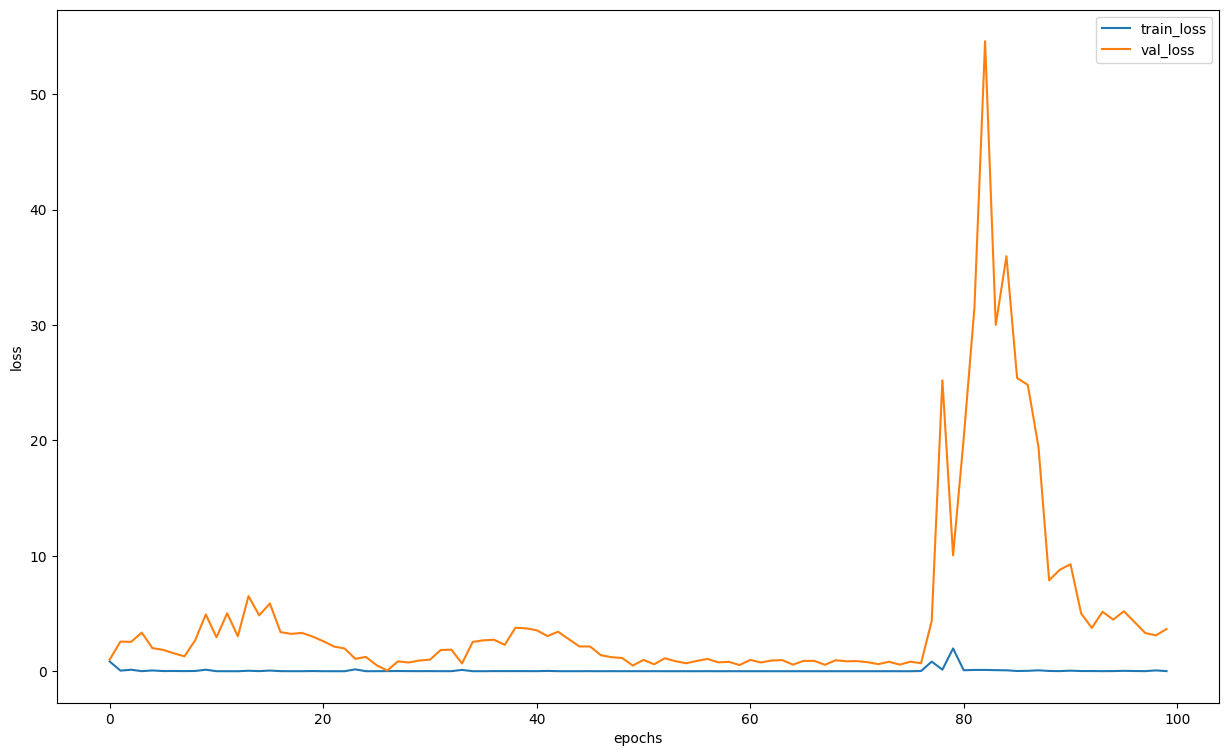

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [143]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
        filenames = []

        for batch in test_loader:
            inputs, names = batch  # Разделяем батч на изображения и имена файлов
            inputs = inputs.to(DEVICE)  # Переносим изображения на устройство (GPU или CPU)
            model.eval()
            outputs = model(inputs).cpu()  # Получаем предсказания модели
            logits.append(outputs)
            filenames.extend(names)  # Сохраняем имена файлов

    # Объединяем все предсказания и применяем softmax
    probs = torch.nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs, filenames

In [147]:
probs, filenames = predict(model, test_loader)

In [157]:
filenames[:5]

['0223.jpg', '0325.jpg', '0735.jpg', '0504.jpg', '0397.jpg']

In [162]:
import os
import torch
import csv
from PIL import Image
from torchvision import transforms

def prepare_submission(model, folder_path, output_csv='/kaggle/working/submission.csv'):
    # Трансформации для изображений
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Изменение размера изображений
        transforms.ToTensor(),  # Преобразование в тензор
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Нормализация
    ])

    # Списки для хранения данных
    image_tensors = []  # Тензоры изображений
    image_filenames = []  # Имена файлов (айди)

    # Сортируем файлы по имени (айди)
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Проверяем формат файла
            img_path = os.path.join(folder_path, filename)
            image = Image.open(img_path).convert('RGB')  # Открываем изображение и конвертируем в RGB
            image_tensor = transform(image)  # Применяем трансформации
            image_tensors.append(image_tensor)
            image_filenames.append(os.path.splitext(filename)[0])  # Извлекаем айди (без расширения)

    # Объединяем тензоры в один батч и переносим на устройство (GPU или CPU)
    image_tensors = torch.stack(image_tensors).to(DEVICE)

    # Получаем предсказания модели
    with torch.no_grad():
        output = torch.argmax(model(image_tensors), dim=1)  # Предсказанные классы (0 или 1)

    # Сохраняем результаты в CSV-файл
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "label"])  # Заголовок CSV

        # Записываем айди и метки
        for filename, label in zip(image_filenames, output):
            label_text = "cleaned" if label.item() == 0 else "dirty"  # Преобразуем метку в текст
            writer.writerow([filename, label_text])
    print(f"Submission file saved to {output_csv}")

# Подготовка submission-файла
model.eval()
test_folder_path = "./plates/test"
results_root = "./"
os.makedirs(results_root, exist_ok=True)
prepare_submission(model, test_folder_path, output_csv=f"{results_root}/submission.csv")
print(f"Submission ready in `{results_root}/submission.csv`")

Submission file saved to .//submission.csv
Submission ready in `.//submission.csv`


In [161]:
import pandas as pd

# Предположим, что probs и filenames уже получены
probs, filenames = predict(model, test_loader)

# Извлекаем номера (ID) из имен файлов
ids = [filename.split('.')[0] for filename in filenames]

# Создаем DataFrame с результатами
results = pd.DataFrame({
    'id': ids,  # Номера (ID)
    'label': probs.argmax(axis=1)  # Предсказанный класс (0 или 1)
})

# Сортируем DataFrame по айди (как числам)
results = results.iloc[results['id'].astype(int).argsort()]

# Сохраняем результаты в CSV-файл
results.to_csv('predictions.csv', index=False)

In [156]:
results

,id,label
0,0223,1
1,0325,0
2,0735,0
3,0504,1
4,0397,1
...,...,...
739,0554,1
740,0004,1
741,0699,1
742,0611,1
